In [2]:
# Improve by ChatGPT & GitHub Copilot

# Running the requierements.ipynb
%run requierements.ipynb

In [14]:
SSH_01 = xr.open_dataset('/bettik/PROJECTS/pr-data-ocean/riverama/CALEDO60/CALEDO60-TRPC12NT0_y2014m01d01-d31.1h_SSH.nc')
SSH = xr.open_mfdataset("/bettik/PROJECTS/pr-data-ocean/riverama/CALEDO60/*_SSH.nc", combine="nested", concat_dim="time_counter", parallel=True)

/home/riverama/.conda/envs/env-stage/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/riverama/.conda/envs/env-stage/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array

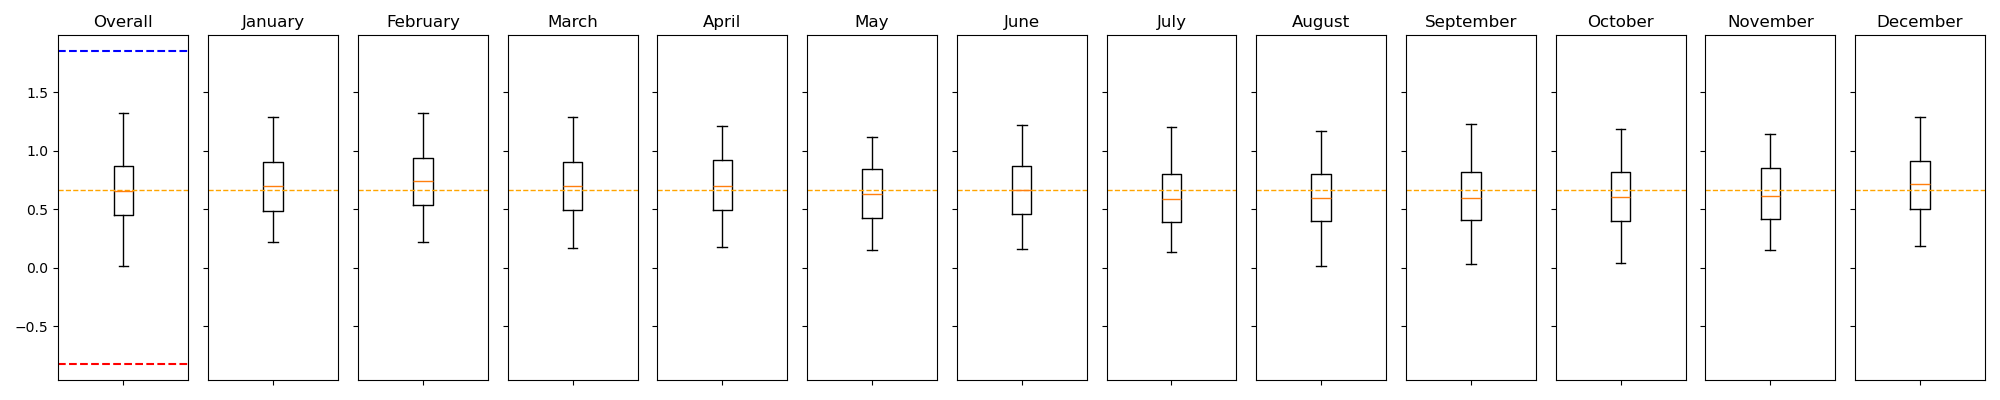

In [26]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import calendar

# Assuming SSH is your loaded dataset

# Calculate spatial mean to get a 1D time series
overall_mean_series = SSH['zos'].mean(dim=['y', 'x'])

# Convert the overall mean series to a numpy array and reshape for compatibility
overall_mean_array = overall_mean_series.to_numpy().reshape(-1)

# Calculate the overall mean for the entire dataset to use for the horizontal line
overall_dataset_mean = overall_mean_array.mean()

# Create a figure with 13 subplots (1 for overall data, 12 for each month)
fig, axes = plt.subplots(1, 13, figsize=(20, 4), sharey=True)

# Box plot for overall data
axes[0].boxplot(overall_mean_array)
axes[0].set_title('Overall')
axes[0].set_xticklabels([''])

# Draw a horizontal line representing the overall dataset mean
axes[0].axhline(y=overall_dataset_mean, color='orange', linestyle='--', linewidth=1, label='Overall Mean')
axes[0].axhline(y=SSH['zos'].max().values, color='blue', linestyle='--', label='Overall Max')
axes[0].axhline(y=SSH['zos'].min().values, color='red', linestyle='--', label='Overall Min')


# Calculate monthly means and plot each month with month names
for i in range(1, 13):
    monthly_mean_series = SSH['zos'].sel(time_counter=SSH['time_counter'].dt.month == i).mean(dim=['y', 'x'])
    monthly_mean_array = monthly_mean_series.to_numpy().reshape(-1)
    # Use calendar.month_name to get the full name of the month
    month_name = calendar.month_name[i]
    axes[i].boxplot(monthly_mean_array)
    axes[i].set_title(month_name)  # Set the title to the month's name
    axes[i].set_xticklabels([''])
    # Draw a horizontal line for the overall mean on each monthly plot
    axes[i].axhline(y=overall_dataset_mean, color='orange', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()


/home/riverama/.conda/envs/env-stage/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/home/riverama/.conda/envs/env-stage/lib/python3.11/site-packages/xarray/core/indexing.py:1443: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array

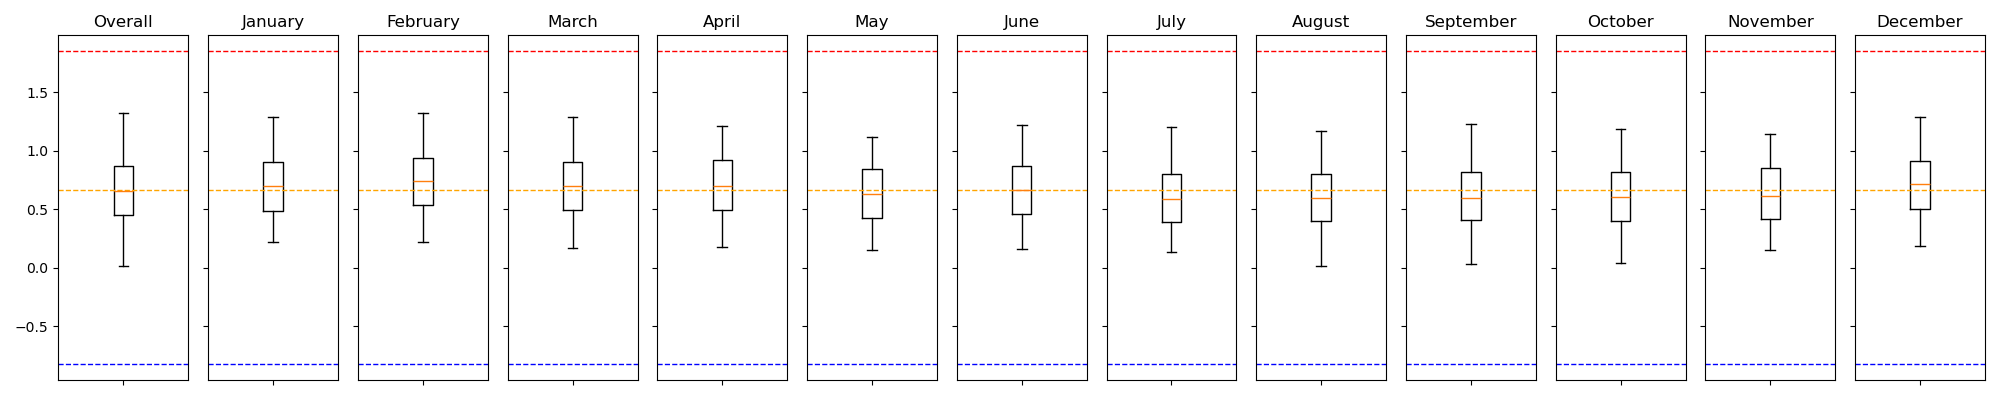

In [27]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import calendar

# Assuming SSH is your loaded dataset

# Calculate spatial mean to get a 1D time series
overall_mean_series = SSH['zos'].mean(dim=['y', 'x'])

# Convert the overall mean series to a numpy array and reshape for compatibility
overall_mean_array = overall_mean_series.to_numpy().reshape(-1)

# Calculate the overall mean for the entire dataset to use for the horizontal line
overall_dataset_mean = overall_mean_array.mean()

# Determine the global max and min for the SSH values to use across all plots
global_max_ssh = SSH['zos'].max().values
global_min_ssh = SSH['zos'].min().values

# Create a figure with 13 subplots (1 for overall data, 12 for each month)
fig, axes = plt.subplots(1, 13, figsize=(20, 4), sharey=True)

# Box plot for overall data
axes[0].boxplot(overall_mean_array)
axes[0].set_title('Overall')
axes[0].set_xticklabels([''])

# Draw horizontal lines for the overall mean, max, and min on the overall data plot
axes[0].axhline(y=overall_dataset_mean, color='orange', linestyle='--', linewidth=1, label='Overall Mean')
axes[0].axhline(y=global_max_ssh, color='red', linestyle='--', linewidth=1, label='Global Max SSH')
axes[0].axhline(y=global_min_ssh, color='blue', linestyle='--', linewidth=1, label='Global Min SSH')

# Calculate monthly means and plot each month with month names
for i in range(1, 13):
    monthly_mean_series = SSH['zos'].sel(time_counter=SSH['time_counter'].dt.month == i).mean(dim=['y', 'x'])
    monthly_mean_array = monthly_mean_series.to_numpy().reshape(-1)
    month_name = calendar.month_name[i]
    axes[i].boxplot(monthly_mean_array)
    axes[i].set_title(month_name)
    axes[i].set_xticklabels([''])
    # Draw a horizontal line for the overall mean, max, and min on each monthly plot
    axes[i].axhline(y=overall_dataset_mean, color='orange', linestyle='--', linewidth=1)
    axes[i].axhline(y=global_max_ssh, color='red', linestyle='--', linewidth=1)
    axes[i].axhline(y=global_min_ssh, color='blue', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()


In [23]:
# Assuming SSH is your loaded dataset and 'zos' is the variable of interest
max_value = SSH['zos'].max().values
mean_value = SSH['zos'].mean().values
min_value = SSH['zos'].min().values

print(f"Maximum value of 'zos': {max_value}")
print(f"Minimum value of 'zos': {mean_value}")
print(f"Minimum value of 'zos': {min_value}")


Maximum value of 'zos': 1.8523073196411133
Minimum value of 'zos': 0.660402238368988
Minimum value of 'zos': -0.8265997767448425


In [6]:
# Selecting the data for the first day of January 2014
SSH_01_first_day = SSH_01.sel(time_counter=slice('2014-01-01 00:30', '2014-01-01 23:30'))
SSH_01_first_day
# Selecting the first 24 time steps, assuming hourly data
#SSH_01_first_day = SSH_01.isel(time_counter=slice(0, 24))


<xarray.Dataset>
Dimensions:              (y: 853, x: 788, time_counter: 24, axis_nbounds: 2)
Coordinates:
    nav_lat              (y, x) float32 -28.8 -28.8 -28.8 ... -15.7 -15.7 -15.7
    nav_lon              (y, x) float32 159.2 159.2 159.3 ... 172.3 172.3 172.3
  * time_counter         (time_counter) datetime64[ns] 2014-01-01T00:30:00 .....
    time_instant         (time_counter) datetime64[ns] ...
Dimensions without coordinates: y, x, axis_nbounds
Data variables:
    time_counter_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_instant_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    zos                  (time_counter, y, x) float32 ...
Attributes:
    name:         1_/scratch/cnt0024/ige2071/brodeau/NEMO/TROPICO12/TROPICO12...
    description:  ocean T grid variables
    title:        ocean T grid variables
    Conventions:  CF-1.6
    timeStamp:    2021-Jul-30 09:28:08 GMT
    uuid:         dfea4106-852e-44e9-a456-80ebfbca9f95
    history:      Fri Feb  2 16:39:45 2024: /lus/home/CT1/ige2071/aalbert/.co...
    NCO:          netCDF Operators version 5.1.4 (Homepage = http://nco.sf.ne...

In [7]:
# Assuming SSH_01_first_day is your dataset for the first day

# Step 1: Create a new time coordinate with 10-minute intervals for the first day of January 2014
new_time = pd.date_range(start='2014-01-01 00:30', end='2014-01-01 23:30', freq='10T')

# Step 2: Interpolate the SSH_01_first_day dataset to the new time coordinate
SSH_01_first_day_upscaled = SSH_01_first_day.interp(time_counter=new_time, method='cubic')

# Note: Ensure that the dimension name 'time_counter' matches exactly what is in your dataset.
# If the time dimension is named differently, adjust 'time_counter' in the interp function accordingly.


In [8]:
print(SSH_01_first_day_upscaled)


<xarray.Dataset>
Dimensions:       (y: 853, x: 788, time_counter: 139)
Coordinates:
    nav_lat       (y, x) float32 -28.8 -28.8 -28.8 -28.8 ... -15.7 -15.7 -15.7
    nav_lon       (y, x) float32 159.2 159.2 159.3 159.3 ... 172.3 172.3 172.3
  * time_counter  (time_counter) datetime64[ns] 2014-01-01T00:30:00 ... 2014-...
Dimensions without coordinates: y, x
Data variables:
    zos           (time_counter, y, x) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    name:         1_/scratch/cnt0024/ige2071/brodeau/NEMO/TROPICO12/TROPICO12...
    description:  ocean T grid variables
    title:        ocean T grid variables
    Conventions:  CF-1.6
    timeStamp:    2021-Jul-30 09:28:08 GMT
    uuid:         dfea4106-852e-44e9-a456-80ebfbca9f95
    history:      Fri Feb  2 16:39:45 2024: /lus/home/CT1/ige2071/aalbert/.co...
    NCO:          netCDF Operators version 5.1.4 (Homepage = http://nco.sf.ne...


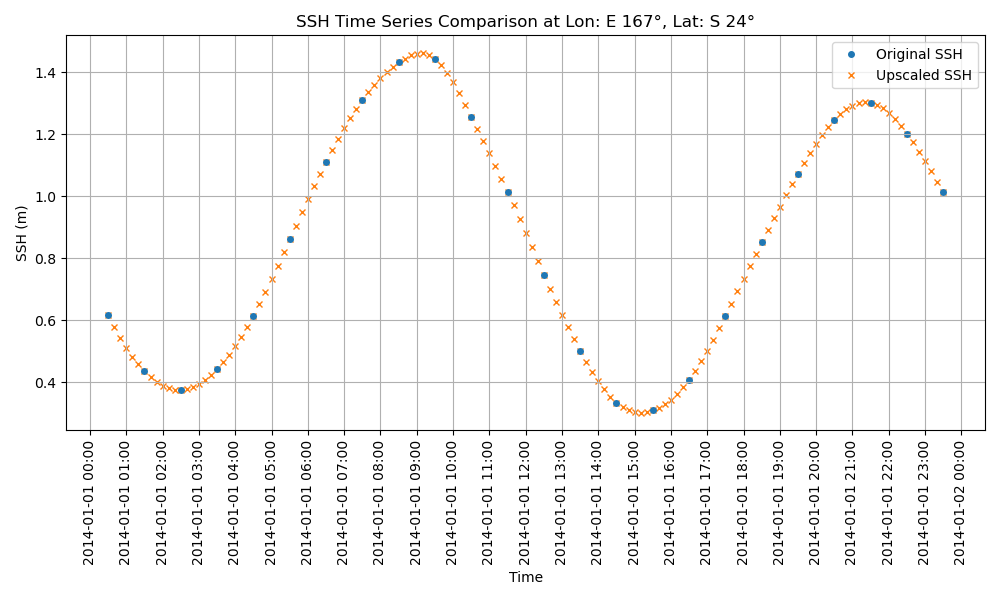

In [12]:
# Assuming SSH_01 and SSH_01_first_day_upscaled are already defined datasets

# Coordinates of the point of interest
lon_target = 167.0  # Longitude E 167°
lat_target = -24.0  # Latitude S 24° (negative for South)

# Find the closest grid point
abs_diff_lon = np.abs(SSH_01.nav_lon - lon_target)
abs_diff_lat = np.abs(SSH_01.nav_lat - lat_target)
min_diff = np.sqrt(abs_diff_lon**2 + abs_diff_lat**2)  # Euclidean distance
closest_point = np.unravel_index(min_diff.argmin(), SSH_01.nav_lon.shape)

# Extract the SSH time series data for the closest grid point from both datasets
ssh_time_series_original = SSH_01_first_day.zos[:, closest_point[0], closest_point[1]]
ssh_time_series_upscaled = SSH_01_first_day_upscaled.zos[:, closest_point[0], closest_point[1]]

# Plot the comparison
plt.figure(figsize=(10, 6))
plt.plot(SSH_01_first_day.time_counter, ssh_time_series_original, label='Original SSH', marker='o', markersize=4, linestyle='-', linewidth=0, zorder=1)
plt.plot(SSH_01_first_day_upscaled.time_counter, ssh_time_series_upscaled, label='Upscaled SSH', marker='x', markersize=4, linestyle='-', linewidth=0, zorder=0)
plt.xlabel('Time')
plt.ylabel('SSH (m)')
plt.title('SSH Time Series Comparison at Lon: E 167°, Lat: S 24°')
plt.legend()
plt.grid(True)

# Adjusting x-axis to show dates clearly
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
